In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from ga import GA
from graph import Graph

In [3]:
g = Graph.from_file("instances/myciel4.col")
nb_runs = 50
population_size = 50
max_generations = 120

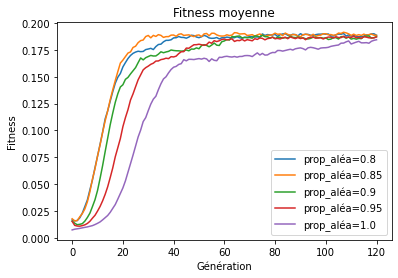

In [4]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
rand_proportions = np.arange(0.8, 1.01, 0.05).round(2)
f = open("ga_concepts/parameters/rand_proportions_tmp.npy", "wb")
for rand_proportion in rand_proportions:
    total_avgs_fitness = np.zeros(max_generations + 1)
    for _ in range(nb_runs):
        col = GA(g, population_size=population_size, rand_proportion=rand_proportion, max_generations=max_generations)
        gens_info, t = col.solve()
        total_avgs_fitness += np.array(gens_info[3])
    total_avgs_fitness /= nb_runs
    np.save(f, total_avgs_fitness)
    ax.plot(x, total_avgs_fitness, label=f"prop_aléa={rand_proportion}")
f.close()
ax.set_title("Fitness moyenne")
ax.set_xlabel("Génération")
ax.set_ylabel("Fitness")
ax.legend()
fig.savefig("ga_concepts/parameters/rand_proportions_tmp.pdf", bbox_inches='tight')

In [21]:
rand_proportion = 0.85

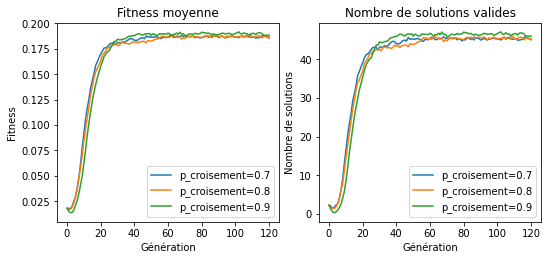

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(7.5, 3.5), constrained_layout=True)
x = np.arange(0, max_generations + 1)
crossover_rates = np.arange(0.7, 0.91, 0.1).round(2)
f = open("ga_concepts/parameters/crossover_rates_tmp.npy", "wb")
for crossover_rate in crossover_rates:
    total_nb_solutions = np.zeros(max_generations + 1)
    total_avgs_fitness = np.zeros(max_generations + 1)
    for _ in range(nb_runs):
        col = GA(
            g,
            population_size=population_size,
            rand_proportion=rand_proportion,
            crossover_rate=crossover_rate,
            max_generations=max_generations
        )
        gens_info, t = col.solve()
        total_nb_solutions += np.array(gens_info[2])
        total_avgs_fitness += np.array(gens_info[3])
    total_nb_solutions /= nb_runs
    total_avgs_fitness /= nb_runs
    np.save(f, total_nb_solutions)
    np.save(f, total_avgs_fitness)
    ax[1].plot(x, total_nb_solutions, label=f"p_croisement={crossover_rate}")
    ax[0].plot(x, total_avgs_fitness, label=f"p_croisement={crossover_rate}")
f.close()
ax[1].set_title("Nombre de solutions valides")
ax[1].set_xlabel("Génération")
ax[1].set_ylabel("Nombre de solutions")
ax[1].legend()
ax[0].set_title("Fitness moyenne")
ax[0].set_xlabel("Génération")
ax[0].set_ylabel("Fitness")
ax[0].legend()
fig.savefig("ga_concepts/parameters/crossover_rates_tmp.pdf", bbox_inches='tight')

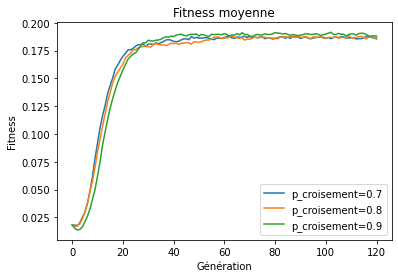

In [36]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
with open("ga_concepts/parameters/crossover_rates.npy", 'rb') as f:
    crossover_rates = np.arange(0.7, 0.91, 0.1).round(2)
    for crossover_rate in crossover_rates:
        total_nb_solutions = np.load(f)
        total_avgs_fitness = np.load(f)
        ax.plot(x, total_avgs_fitness, label=f"p_croisement={crossover_rate}")
    ax.set_title("Fitness moyenne")
    ax.set_xlabel("Génération")
    ax.set_ylabel("Fitness")
    ax.legend()
    fig.savefig("ga_concepts/parameters/crossover_rates_light.pdf", bbox_inches='tight')

In [37]:
crossover_rates = 0.9